Importing needed Packages

In [1748]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objects as go
import operator

Creating dataframes for each sheet by reading the excel file -'V02Max_Combined'

In [1190]:
file_path='Hackathon_Aug24/V02Max_Combined.xlsx'
Kayaking=pd.read_excel(file_path,sheet_name='Kayaking')
Athletes=pd.read_excel(file_path,sheet_name='Athletes')
Triathlon=pd.read_excel(file_path,sheet_name='Triathlon')
Fencing=pd.read_excel(file_path,sheet_name='Fencing')


C:\Users\Sailu\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\Sailu\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\Sailu\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [18]:
print(Kayaking)

       ID      time     RR       VO2  power
0      11  -168.600  727.0  0.287147      0
1      11  -167.872  728.0  0.287147      0
2      11  -167.148  724.0  0.287147      0
3      11  -166.484  664.0  0.320580      0
4      11  -165.836  648.0  0.320580      0
...    ..       ...    ...       ...    ...
19473  16  1118.404  548.0  0.671957      0
19474  16  1118.944  540.0  0.671957      0
19475  16  1119.484  540.0  0.671957      0
19476  16  1120.016  532.0  0.671957      0
19477  16  1120.544  528.0  0.671957      0

[19478 rows x 5 columns]


Creating a column called 'Sport' into the dataframes

Concatenating all the dataframes (all the sheets into one)

In [1402]:
combined=pd.concat([Kayaking,Triathlon,Fencing])
merged=pd.merge(combined,Athletes,on='ID')

In [1192]:
combined.head()

,ID,time,RR,VO2,power
0,11,-168.600,727.0,0.287147,0
1,11,-167.872,728.0,0.287147,0
2,11,-167.148,724.0,0.287147,0
3,11,-166.484,664.0,0.320580,0
4,11,-165.836,648.0,0.320580,0


In [1194]:
combined.tail()

,ID,time,RR,VO2,power
27598,10,942.700,428.0,0.786363,0
27599,10,943.124,424.0,0.786363,0
27600,10,943.552,428.0,0.786363,0
27601,10,943.976,424.0,0.786363,0
27602,10,944.404,428.0,0.786363,0


### Q17 ) What is the maximum ventilatory threshold for triathletes.

In [1317]:
Triathletes=Athletes[(Athletes['sport']=='triathlon')]
#Triathletes

Max_Ventilatory_threshold=Triathletes[['P_vt1','P_vt2']].describe()
Max_Ventilatory_threshold.loc['max']

#Another Solution
#Max_Ventilatory_threshold=Triathletes[['P_vt1','P_vt2']].max()
#Max_Ventilatory_threshold


P_vt1    101.0
P_vt2    168.0
Name: max, dtype: float64

### Q18)Display the number of athletes in every sport against the name of the sport.

In [1320]:
Athletes['sport'].value_counts()

sport
fencing      10
kayak         6
triathlon     2
Name: count, dtype: int64

### Q22)Using any 10 HR values print even if the value is an even number and odd if its an odd number

In [1326]:
combined['HR']=round(60000/combined['RR'])
HR_random=combined['HR']
HR_random=HR_random.drop_duplicates().head(10)
#HR_random=HR_random.head(10)

for i in HR_random:
    if i%2==0:
        print(i," - even ")
    else:
        print(i," - odd ")


83.0  - odd 
82.0  - even 
90.0  - even 
93.0  - odd 
97.0  - odd 
86.0  - even 
75.0  - odd 
76.0  - even 
78.0  - even 
77.0  - odd 


### Q24)Store athlete name and sport in a dictionary as a pair of values.

In [1330]:
fname=Athletes['First Name']
lname=Athletes['Last Name']
full_name=fname+' '+lname
Name_sport_dict=Athletes.set_index(full_name)['sport'].to_dict()
Name_sport_dict

{'Olivia Martinez': 'fencing',
 'Ethan Reynolds': 'fencing',
 'Jackson Harper': 'fencing',
 'Liam Sanchez': 'fencing',
 'Ava Thompson': 'fencing',
 'Sophia Rodriguez': 'fencing',
 'Grace Simmons': 'fencing',
 'Aiden Bennett': 'fencing',
 'Chloe Price': 'fencing',
 'Lily Jordan': 'fencing',
 'Isabella Griffin': 'kayak',
 'Caleb Dixon': 'kayak',
 'Mia Carpenter': 'kayak',
 'Harper Mitchell': 'kayak',
 'Mason Wallace': 'kayak',
 'Logan Anderson': 'kayak',
 'Lucas Foster': 'triathlon',
 'Owen Myers': 'triathlon'}

### Q25) Using arrays and loops, find the count of athletes based on gender.

In [1332]:
athletes_male=[]
athletes_female=[]

for fname,gender in zip(Athletes['First Name'],Athletes['Gender']):
    if gender == 'Male':
        athletes_male.append(fname)      
    else:
        athletes_female.append(fname)
        
print('Male: ',len(athletes_male))
print('Female: ',len(athletes_female))


Male:  8
Female:  10


### Q31)Return the count of athletes for any sport that the user inputs.

In [1338]:
sport_in=input("Enter any sport from the following - fencing/triathlon/kayak")
df=Athletes['sport'].value_counts()
df=df.to_dict()
#print(type(df))

for i in df:
        if i ==sport_in:
            print(df[sport_in])
        else:
            continue
            

Enter any sport from the following - fencing/triathlon/kayak triathlon


2


### Q28) Print athlete 15s Age and Pvt1 using the format() function

In [1354]:
df=Athletes[(Athletes['ID'] == 15)]
df_dict=df.to_dict('list')

athlete_details="Athlete ID is {ID}, His age is {age} and his P_vt1 is {pvt1}".format(ID=df_dict['ID'],age=df_dict['age'],pvt1=df_dict['P_vt1'])
print(athlete_details)


Athlete ID is [15], His age is [13] and his P_vt1 is [125]


### Q32)Insert the name of every athlete into an array and display the length of that array.

In [1376]:
arr=[]
fname=Athletes['First Name']
lname=Athletes['Last Name']
full_name=fname+' '+lname


for i in full_name:
    arr.append(i)    
print(len(arr))


18


### Q21) Display a pie chart of number of athletes by sport.

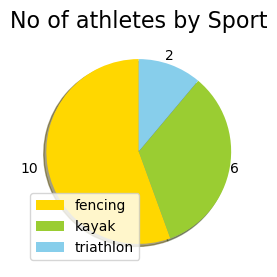

In [1384]:
df=Athletes['sport'].value_counts()
df=df.to_dict()

sport=[]
No_of_athletes=[]

for key in df.keys():
    sport.append(key)
    No_of_athletes.append(df[key])

#print(sport)
#print(No_of_athletes)

colors = ['gold', 'yellowgreen','skyblue']

plt.figure(figsize=(len(sport),len(No_of_athletes)))  
plt.pie(No_of_athletes, labels = No_of_athletes,colors=colors,shadow=True,startangle=90, center = (-2,0))
plt.title("No of athletes by Sport", fontsize=16)
plt.legend(labels = sport)



##### 

### Q19) Display a bar chart showing the average V02 Max by sport.

<BarContainer object of 3 artists>

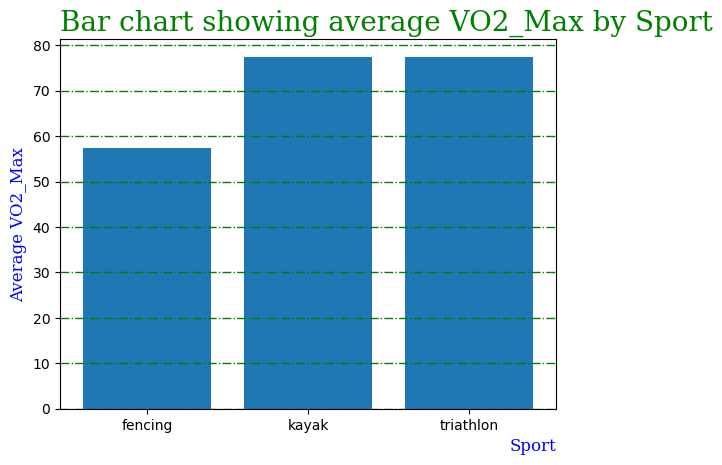

In [1386]:
#for calculating the average VO2
sum_vo2=merged.groupby(['ID'])['VO2'].sum()
#print(sum_vo2)
df1=pd.merge(sum_vo2,Athletes,on='ID',how='inner')[['ID','VO2','sport','Weight']]
#print(df1)

for index,row in df1.iterrows():
      df1.at[index,'max_vo2']=round(df1.at[index,'VO2']/df1.at[index,'Weight'],2)
      df2=df1.groupby('sport')['max_vo2'].mean()
#print(df2)

sport=[]
avg_vo2_max=[]

for key in df2.keys():
    sport.append(key)
    avg_vo2_max.append(df2[key])
    
#print(sport)
#print(avg_vo2_max)

font1 = {'family':'serif', 'color':'green', 'size':20}
font2 = { 'family':'serif', 'color':'blue', 'size':12}

plt.xlabel("Sport", fontdict = font2, loc = "right")
plt.ylabel("Average VO2_Max", fontdict = font2, loc='center') # top, center, bottom
plt.title("Bar chart showing average VO2_Max by Sport", fontdict = font1, loc = 'left')

plt. grid(axis = 'y',color ='g', linestyle = 'dashdot', linewidth=1) # dashed, solid, dottedd, dashdot, '-' ':', 'None', " ", '','-.'
plt.bar(sport,avg_vo2_max)


### Q27)Calculate the average heart rate for every minute for every athlete and add it as a column in the same dataframe.

In [1305]:
avg_hr=combined.groupby(['ID'])['HR'].mean().reset_index(name='Avg_HR')
Merge_avg_hr=pd.merge(combined,avg_hr,on='ID',how='inner')
print(avg_hr)
print(Merge_avg_hr)

    ID      Avg_HR
0    1  155.113608
1    2  139.278000
2    3  136.631136
3    4  149.045479
4    5  145.516694
5    6  136.743571
6    7  144.889443
7    8  137.653937
8    9  153.429330
9   10  150.330171
10  11  139.569701
11  12  141.902961
12  13  143.139126
13  14  143.106481
14  15  144.952806
15  16  142.706338
16  17  138.977710
17  18  146.173084
       ID     time     RR       VO2  power     HR      Avg_HR
0      11 -168.600  727.0  0.287147      0   83.0  139.569701
1      11 -167.872  728.0  0.287147      0   82.0  139.569701
2      11 -167.148  724.0  0.287147      0   83.0  139.569701
3      11 -166.484  664.0  0.320580      0   90.0  139.569701
4      11 -165.836  648.0  0.320580      0   93.0  139.569701
...    ..      ...    ...       ...    ...    ...         ...
52057  10  942.700  428.0  0.786363      0  140.0  150.330171
52058  10  943.124  424.0  0.786363      0  142.0  150.330171
52059  10  943.552  428.0  0.786363      0  140.0  150.330171
52060  10  943.976 

### Q30) Display the HRV of each athlete?

In [859]:
HRV_athlete=combined.groupby(['ID'])['RR'].std()
print(HRV_athlete)

ID
1     121.157152
2     180.730679
3     115.570278
4      96.588612
5     140.756819
6     347.787239
7     121.684478
8     387.432612
9     115.715009
10    133.765589
11     99.785372
12    110.027812
13    100.119653
14    172.115157
15    137.059986
16    575.089786
17    130.962202
18    143.344855
Name: RR, dtype: float64


<BarContainer object of 3 artists>

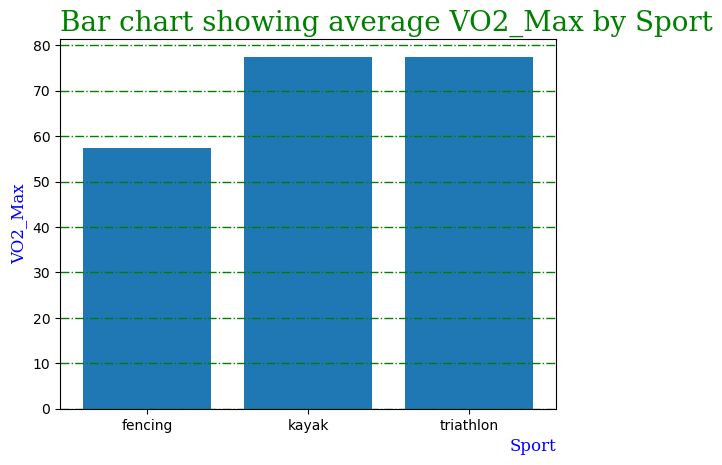

In [923]:
#for calculating the average VO2
sum_vo2=merged.groupby(['sport','ID'])['VO2'].sum()
#print(sum_vo2)
df1=pd.merge(sum_vo2,Athletes,on='ID',how='inner')[['ID','VO2','sport','Weight']]
#print(df1)
for index,row in df1.iterrows():
      df1.at[index,'max_vo2']=round(df1.at[index,'VO2']/df1.at[index,'Weight'],2)
      df2=df1.groupby('sport')['max_vo2'].mean()
#print(df2)

sport=[]
avg_vo2_max=[]

for key in df2.keys():
    sport.append(key)
    avg_vo2_max.append(df2[key])
    
#print(sport)
#print(avg_vo2_max)

font1 = {'family':'serif', 'color':'green', 'size':20}
font2 = { 'family':'serif', 'color':'blue', 'size':12}

plt.xlabel("Sport", fontdict = font2, loc = "right")
plt.ylabel("VO2_Max", fontdict = font2, loc='center') # top, center, bottom
plt.title("Bar chart showing average VO2_Max by Sport", fontdict = font1, loc = 'left')

plt. grid(axis = 'y',color ='g', linestyle = 'dashdot', linewidth=1) # dashed, solid, dottedd, dashdot, '-' ':', 'None', " ", '','-.'
plt.bar(sport,avg_vo2_max)


### Q29) On average how long was each participants’ warm up?

In [1595]:
def Heart_Rate(rr):
    return round(60*1000/rr,2)
def Heartrate_Zone(hr):
    if hr<100:
        return 'Zone 1 (recovery/easy)'
    elif hr>=100 and hr<120:
        return 'Zone 2 (Aerobic/base)'
    elif hr>=120 and hr<135:
        return 'Zone 3 (tempo)'
    elif hr>=135 and hr<155:
        return 'Zone 4 (Lactate threshold)'
    else:
        return 'Zone 5(AnAerobic)'
combined['HR']=combined['RR'].apply(Heart_Rate)
combined['HR_Zone']=combined['HR'].apply(Heartrate_Zone)
#pd.set_option('display.max_rows',1000)
#print(combined)
 
conditions=[
    (combined['time']<0),
    (combined['time']>=0) & (combined['power']>0),
    (combined['time']>0) & (combined['power']<=0)
]
choices=['Warm up','Get','Cool down']
combined['stage']=np.select(conditions,choices,default='cool down')
#print(combined)

Stage_ID_HR_counts=combined.groupby(['ID','HR_Zone'])['stage'].value_counts()
#print(Stage_ID_HR_counts.head(25))

Stage_df=combined[(combined['stage'] == 'Warm up')]
#print(Stage_df)

ID_wrt_time=Stage_df.groupby(['ID'])['time'].min()
ID_wrt_time.to_dict()

for key in ID_wrt_time.keys():
    ID_wrt_time[key]=round(abs(ID_wrt_time[key])/60,2)


# For adding label to time in minutes - used below formatting technique
print("{:<8} {:<15} ".format('ID','Time in Minutes'))
for k, v in ID_wrt_time.items():
    label = v
    print("{:<8} {:<15} ".format(k, label))


ID       Time in Minutes 
1        2.18            
2        3.66            
3        3.04            
4        3.06            
5        3.01            
6        3.07            
7        3.04            
8        3.04            
9        3.6             
10       3.04            
11       2.81            
12       3.05            
13       3.07            
14       2.68            
15       3.08            
16       2.75            
17       3.04            
18       3.02            


### Q26) Create a sankey diagram to show the groups of race within each sport

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
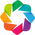

:Sankey   [sport,Ethnicity]   (count)

In [1398]:
import holoviews as hv

df=Athletes.groupby(['sport'])['Ethnicity'].value_counts().reset_index(name="count")
#print(df)

hv.extension('bokeh')
sankey = hv.Sankey(df, label='Demographics by Sport')
sankey.opts(label_position='left', edge_color='Ethnicity', node_color='index', cmap='tab20')


### Q20) Analyze the trend of HR at the start of the test vs the middle and the end.What is the overall trend? 



 Based on the analysis - As the Graded Exercise Test is done for a longer time,  we can see that the trend of Heart Rate is also increasing




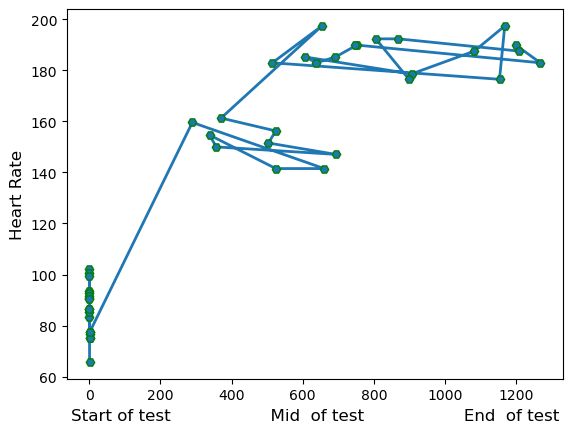

In [1580]:

conditions=[
    (combined['time']<0),
    (combined['time']>0) & (combined['power']>0),
    (combined['time']>0) & (combined['power']<=0)
]
choices=['Warm up','Get','Cool down']
combined['stage']=np.select(conditions,choices,default='cool down')

def Heart_Rate(rr):
    return round(60*1000/rr,2)
combined['HR']=combined['RR'].apply(Heart_Rate)

merged=pd.merge(combined,Athletes,on='ID')
    
Stage_df=merged[(merged['stage'] == 'Get')]
#print(Stage_df)

start_test=Stage_df.groupby('ID')['time'].min().reset_index(name='start_time')
middle_test=Stage_df.groupby('ID')['time'].median().reset_index(name='mid_time')
end_test=Stage_df.groupby('ID')['time'].max().reset_index(name='end_time')
#print(start_test)
#print(middle_test)
#print(end_test)

start_test_HR =pd.merge(start_test,Stage_df,left_on=['ID','start_time'],right_on=['ID','time'], how='inner')[['ID','start_time','HR']].sort_values(by='ID')
#print(start_test_HR)

middle_test_HR =pd.merge(middle_test,Stage_df,left_on=['ID','mid_time'],right_on=['ID','time'], how='inner')[['ID','mid_time','HR']].sort_values(by='ID')
#print(middle_test_HR)

end_test_HR =pd.merge(end_test,Stage_df,left_on=['ID','end_time'],right_on=['ID','time'], how='inner')[['ID','end_time','HR']].sort_values(by='ID')
#print(end_test_HR)

merge_test=pd.merge(pd.merge(start_test_HR,middle_test_HR, on='ID', how='left'),end_test_HR,on='ID', how='right')
#print(merge_test)

#name_list = df['Name'].values.tolist()
ID_list=start_test_HR['ID'].values.tolist()
#print(ID_list)
HR_list_st=start_test_HR['HR'].values.tolist()
#print(HR_list_st)
Time_st=start_test_HR['start_time'].values.tolist()
#print(Time_st)

HR_list_md=middle_test_HR['HR'].values.tolist()
#print(HR_list_md)
Time_md=middle_test_HR['mid_time'].values.tolist()
#print(Time_md)

HR_list_end=end_test_HR['HR'].values.tolist()
#print(HR_list_end)
Time_end=end_test_HR['end_time'].values.tolist()
#print(Time_end)

HR_list=HR_list_st+HR_list_md+HR_list_end
Time_list=Time_st+Time_md+Time_end
#print(HR_list)
#print(Time_list)

a = HR_list
b = Time_list

plt.plot(b,a, marker ='H',lw=2, mec = 'g')

plt.xlabel("Start of test                   Mid  of test                   End  of test", fontsize=12)
plt.ylabel("Heart Rate", fontsize= 12)
print()
print()
print(" Based on the analysis - As the Graded Exercise Test is done for a longer time,  we can see that the trend of Heart Rate is also increasing")
print()
print()

### Qs.23 Which heart rate zone did most participants spend the longest duration of time in?

In [1760]:
Stage_ID_HR_counts=combined.groupby(['ID','HR_Zone'])['stage'].value_counts()
#print(Stage_ID_HR_counts.head(25))

warm_up_df=combined[(combined['stage'] == 'Warm up')]
get_df=combined[(combined['stage'] == 'Get')]
cool_down_df=combined[(combined['stage'] == 'Cool down')]
#print(warm_up_df)

######################     Warm UP     ##############################

warm_time=warm_up_df.groupby(['HR_Zone'])['time'].min()
warm_time=warm_time.to_dict()


for key in warm_time.keys():
    warm_time[key]=round(abs(warm_time[key])/60,2)

warm_time['Zone 4 (Lactate threshold)']=0
warm_time['Zone 5(AnAerobic)']=0
#print(warm_time)
# For adding label to time in minutes - used below formatting technique
#print("{:<30} {:<30} ".format('Zone','WU Time Minutes'))
for k, v in warm_time.items():
    label = v
    #print("{:<30} {:<30} ".format(k, label))
    
##########################   GET       ###################################
get_time=get_df.groupby(['HR_Zone'])['time'].max()
#print(get_time)
get_time=get_time.to_dict()

for key in get_time.keys():
    get_time[key]=round(abs(get_time[key])/60,2)

#print(get_time)
# For adding label to time in minutes - used below formatting technique
#print("{:<30} {:<30} ".format('Zone','GET Time Minutes'))
for k, v in get_time.items():
    label = v
    #print("{:<30} {:<30} ".format(k, label))


#################################  Cool Min    ############################
cool_min_time=cool_down_df.groupby(['HR_Zone'])['time'].min()
#print(cool_min_time)
cool_min_time=cool_min_time.to_dict()

for key in cool_min_time.keys():
    cool_min_time[key]=round(abs(cool_min_time[key])/60,2)

#print(cool_min_time)
# For adding label to time in minutes - used below formatting technique
#print("{:<30} {:<30} ".format('Zone','CoolMin Time Minutes'))
for k, v in cool_min_time.items():
    label = v
    #print("{:<30} {:<30} ".format(k, label))

#####################################  Cool Max   ####################################
cool_max_time=cool_down_df.groupby(['HR_Zone'])['time'].max()
#print(cool_max_time)
cool_max_time=cool_max_time.to_dict()

for key in cool_max_time.keys():
    cool_max_time[key]=round(abs(cool_max_time[key])/60,2)

#print(cool_max_time)
# For adding label to time in minutes - used below formatting technique
#print("{:<30} {:<30} ".format('Zone','CoolMax Time Minutes'))
for k, v in cool_max_time.items():
    label = v
    #print("{:<30} {:<30} ".format(k, label))

####################################  Cool_time (Max-Min)  #########################
cool_time={}
######   res = {key: test_dict2[key] - test_dict1[key] for key in set(test_dict1) & set(test_dict2)}
cool_time={key: cool_max_time[key] - cool_min_time[key] for key in set(cool_min_time) & set(cool_max_time)}
#print(type(cool_time))
#print(cool_time)

for key in cool_time.keys():
    cool_time[key]=round(abs(cool_time[key]),2)

#print(cool_time)
# For adding label to time in minutes - used below formatting technique
#print("{:<30} {:<30} ".format('Zone','Cool Time Minutes'))
for k, v in cool_time.items():
    label = v
    #print("{:<30} {:<30} ".format(k, label))

####################   Now, add Warm-up, GET and Cool down time to get total time spent Zone wise  ################################



Total_time={key: warm_time[key] + get_time[key] + cool_time[key] for key in set(warm_time) & set(get_time) & set(cool_time)}


# For adding label to time in minutes - used below formatting technique
print("{:<30} {:<30} ".format('Zone','Total Time in Minutes'))
for k, v in Total_time.items():
    label = v
    print("{:<30} {:<30} ".format(k, label))

##########     Now, Find the Zone with maximum number of minutes spent    ##################
str=max(Total_time.items(), key=operator.itemgetter(1))[0]
print()
print(str," was the Zone with longest duration of time spent by most pariticpants.")
print()

Zone                           Total Time in Minutes          
Zone 5(AnAerobic)              34.71                          
Zone 2 (Aerobic/base)          25.3                           
Zone 1 (recovery/easy)         23.92                          
Zone 4 (Lactate threshold)     28.79                          
Zone 3 (tempo)                 27.03                          

Zone 5(AnAerobic)  was the Zone with longest duration of time spent by most pariticpants.

